In [15]:
from numpy import *
import matplotlib.pyplot as plt
from time import sleep

def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat

def selectJrand(i,m):
    j=i #we want to select any J not equal to i
    while (j==i):
        j = int(random.uniform(0,m))
    return j

def clipAlpha(aj,H,L):
    if aj > H: 
        aj = H
    if L > aj:
        aj = L
    return aj

def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print ("L==H"); continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print ("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print ("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print ("iter: %d i:%d, pairs changed %d" % (iter,i,alphaPairsChanged))
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print ("iteration number: %d" % iter)
    return b,alphas

In [16]:
dataArr,labelArr = loadDataSet('testSet.txt')

ValueError: could not convert string to float: 

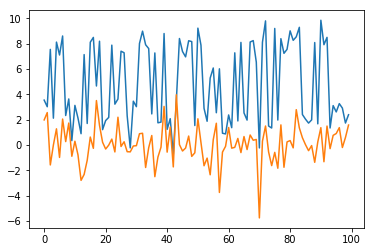

In [14]:
plt.plot(dataArr)
plt.show()

In [3]:
b,alphas = smoSimple(dataArr,labelArr,0.6,0.001,40)

L==H
L==H
iter: 0 i:2, pairs changed 1
iter: 0 i:3, pairs changed 2
L==H
iter: 0 i:5, pairs changed 3
L==H
L==H
L==H
iter: 0 i:11, pairs changed 4
iter: 0 i:15, pairs changed 5
iter: 0 i:17, pairs changed 6
iter: 0 i:18, pairs changed 7
j not moving enough
j not moving enough
L==H
iter: 0 i:25, pairs changed 8
iter: 0 i:26, pairs changed 9
L==H
L==H
iter: 0 i:41, pairs changed 10
iter: 0 i:43, pairs changed 11
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
L==H
L==H
L==H
j not moving enough
iter: 0 i:78, pairs changed 12
iter: 0 i:81, pairs changed 13
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
iter: 0 i:3, pairs changed 1
j not moving enough
L==H
L==H
L==H
iter: 0 i:11, pairs changed 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
iter: 0 i:29, p

j not moving enough
j not moving enough
iteration number: 1
L==H
j not moving enough
iter: 1 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 1 i:55, pairs changed 1
j not moving enough
iteration number: 0
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
iter: 1 i:23, pairs changed 1
j not moving enough
j not moving enough
iter: 1 i:

j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
iter: 9 i:8, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
iter: 4 i:52, pairs changed 1
j not moving enough
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
j

j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
iter: 2 i:55, pairs changed 1
iteration number: 0
L==H
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
L==H
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iter: 2 i:54, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
j not moving enough
j not moving enough
j not moving enough
iteration number: 4
j not moving enough
j not moving enough
j not moving enough
iteration number: 5
j not moving enough
j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
iteration 

j not moving enough
iteration number: 25
j not moving enough
j not moving enough
j not moving enough
iteration number: 26
j not moving enough
j not moving enough
j not moving enough
iteration number: 27
j not moving enough
j not moving enough
j not moving enough
iteration number: 28
j not moving enough
j not moving enough
j not moving enough
iteration number: 29
j not moving enough
j not moving enough
j not moving enough
iteration number: 30
j not moving enough
j not moving enough
j not moving enough
iteration number: 31
j not moving enough
j not moving enough
iter: 31 i:54, pairs changed 1
j not moving enough
iteration number: 0
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 2
j not moving enough
j not moving enough
j not moving enough
iteration number: 3
iter: 3 i:17, pairs changed 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 0
j not moving

j not moving enough
j not moving enough
iteration number: 6
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 7
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 8
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 9
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 10
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 11
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 12
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 13
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 14
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 15
j not moving enough
j not moving e

In [4]:
b

matrix([[-3.68978632]])

In [11]:
alphas[alphas>0]

matrix([[0.12612068, 0.23895416, 0.36507483]])

In [12]:
shape(alphas[alphas>0])

(1, 3)

In [5]:
for i in range(100):
    if alphas[i]>0.0:
        print(dataArr[i],labelArr[i])

[4.658191, 3.507396] -1.0
[3.223038, -0.552392] -1.0
[3.457096, -0.082216] -1.0
[2.893743, -1.643468] -1.0
[6.080573, 0.418886] 1.0
